In [2]:
# We will need a factorial and binomial coefficient function for some of the computations today

def factorial(n):
    
    if n < 1:
        return 1
    else:
        return n*factorial(n-1)
    
def binom(m, n):
    
    return factorial(m)/( factorial(m-n)*factorial(n))

# Binomial Distribution

A *binomial experiment* consists of:

1. The experiment consists of a fixed number, $n$, of identical and independent trials.
2. Each trial results in one of two outcomes: success, S, or failure, F.
3. The probability of success on single trial is $p$, and thus the probability of failure on a single trial is $q = 1-p$
4. The random variable of interest is Y, the number of successes observed during the n trials. 


## Example: COVID in Weld County

At this point 6% of Weld County residents are or have been infected with the Coronavirus. Given this, if we have a class of 80 people at UNC:

1. How likely is it that *exactly* one of them is or was infected?

2. How likely is it that *at least one* of them is or was infected?

3. How likely is it that *at most* one of them was infected?

## Example:  Quality Control and working backwards

We are working for a company that makes widgets. A new business is interested in working with us, but they are going to insist in the parts contract that less than 5 out of every 100 widgets we send them is defective. What do we need to get the defective rate on widgets down to in order to ensure we meet their requirement? 

*note* this is the way it actually works. Quality control is never about getting the number of defects to zero, it is about estimating the likeliehood and cost of a defect so that a company can account for their liability.

$$ P(y) = \begin{pmatrix} 100 \\ y \end{pmatrix} p^y (1-p)^{100-y} $$

Probability that 5 or more widgets is deffective:
$$Q(p) =  1 - \sum_{k=0}^4 P(k) $$

Note that $Q(p)$ is a polynomials of p (though of high degree).

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
p = sp.Symbol('p')

In [5]:
P = {}

for k in range(100+1):
    P[k] = binom(100, k) * p**k * (1-p)**(100-k)
    
Q = sum( [P[y] for y in range(5)] )
Q

3921225.0*p**4*(1 - p)**96 + 161700.0*p**3*(1 - p)**97 + 4950.0*p**2*(1 - p)**98 + 100.0*p*(1 - p)**99 + 1.0*(1 - p)**100

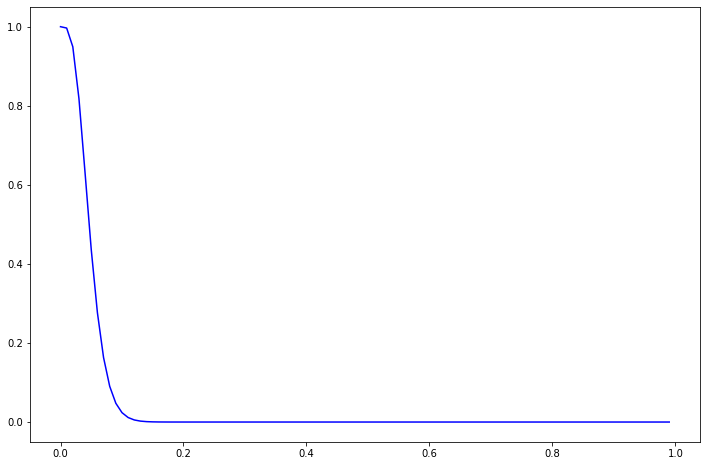

In [6]:
pp = np.arange(0, 1, 0.01)
QQ = [ Q.subs(p, x) for x in pp]
plt.figure(figsize=(12, 8))
plt.plot(pp, QQ, 'b-')

In practice what we would also want to know is the cost function for p:  To achieve a quality assurance of 9% or better, how much would it cost?

## Expected Value of Binomial Distribution

If Y is a binomial random variable with probability p and n trials:

$$ E(Y) = p n $$

$$ \sigma^2 = V(Y) = n p q $$

Sketch of the proof:

$$ E(Y) = \sum_{y=0}^n y \binom{n}{y} p^y (1-p)^{n-y} $$

$$ = \sum_{y=1}^n y \frac{n!}{(n-y)! y!} p^y (1-p)^{n-y} $$

$$ = \sum_{y=1}^n \frac{n!}{(n-y)! (y-1)!} p^y (1-p)^{n-y} $$

This last expression is a sum of terms that are very close to a binomial probability themselves. Factor out an $n p$ from each term in the sum:

$$ = np \sum_{y=1}^n \frac{(n-1)!}{(n-1 - (y-1)!)(y-1)!} p^{y-1} (1-p)^{n-1 - (y-1)} $$

and reset the index of the sum

$$ = np \sum_{y=0}^{n-1} \binom{n-1}{y} p^y (1-p)^{n-1 - y} $$

The sum is now a sum of binomial probabilities for $n-1$ trials and thus gives 1 and the result follows.

# The Geometric Distribution

Similar to the Binomial Distribution, but focusing on the first success that occurs rather than the number of success after a certain number of trials. For example this matters in cases like equipment failures or other types of "waiting time" problems.

A *geometric experiment* consists of 
1. A variable number of indepdent trials that continue until success has occured.
2. Each trial results in one of two outcomes: success, S, or failure, F.
3. The probability of success on single trial is $p$, and thus the probability of failure on a single trial is $q = 1-p$
4. The random variable of interest is Y, the number of trials needed for the first success.

## Example: Engine Failure

The probability that an engine in an experimental aircraft will fail in one hour of operation is $p = 0.015$. How likely is it that the engine will:

1. Fail in the fifth hour of operation?

2. Fail before the fifth hour of operation?

3. Operate without failure for five hours.

## Expected Value of Geometric Variable

Suppose Y is a random variable with a geometric distribution. Let's compute $E(Y)$.

$$ E(Y) = \sum_{y=1}^\infty y P(y) = \sum_{y=1}^\infty y q^{y-1} p = p \sum_{y=1}^\infty y q^{y-1}$$

The sum is suggestive of a derivative:

$$ \sum_{y=1}^\infty y q^{y-1} = \frac{d}{dq} \sum_{y=1}^\infty q^y = \frac{d}{dq} \frac{q}{1-q} $$



In [7]:
q = sp.Symbol('q')

In [10]:
sp.simplify( sp.diff( q/(1-q), q) )

(q - 1)**(-2)

Show then that

$$ E(y) = \frac{1}{p} $$

A similar derivation gives:  $$\sigma^2 = V(Y) = \frac{1-p}{p^2} $$

## Example: Traffic Intersection

At a particular traffic intersection we find that we have to wait on average 45 seconds for a car to go through. What is the probability p that for any given second a car goes through the intersection?

## What is this all about really?

Particularly, looking at the examples of the geometric distribution, what are we really doing?  For example, does it make sense that the probability of an engine failing in hour 5 really is independent of it having been running for four hours already?  The answer is maybe.  But how can we tell?

The typical way we actually use these results is concluding that something is not a Binomial or Geometric distribution and thus that one of the assumptions (independence or the value of p maybe) is being violated.

